Loading META dataset...
Loaded 576 rows.

Loading PARA dataset...
Loaded 576 rows.

Loading ORTHO dataset...
Loaded 576 rows.

Processing: META CCSD
Data points: 576
Theta range: [0.0000, 180.0000]
Phi range: [0.0000, 360.0000]
Value range: [-3.007841e+03, -3.007754e+03]

Interpolation Accuracy Assessment:
------------------------------------------------------------
Successfully interpolated: 576/576

Absolute Error Statistics:
  Mean: 6.315935e-15
  Std:  5.321902e-14
  Max:  4.547474e-13
  Min:  0.000000e+00

Relative Error Statistics (%):
  Mean: 0.0000%
  Std:  0.0000%
  Max:  0.0000%

5 Worst Interpolation Points:
------------------------------------------------------------
1. Theta=70.4348, Phi=15.6522
   Original: -3007.773088, Interpolated: -3007.773088
   Error: 4.547474e-13, Relative: 0.0000%
2. Theta=31.3043, Phi=15.6522
   Original: -3007.785112, Interpolated: -3007.785112
   Error: 4.547474e-13, Relative: 0.0000%
3. Theta=7.8261, Phi=93.9130
   Original: -3007.814962, Inte

/var/folders/hs/493lh3390kv8z7b8n8zv_p580000gp/T/ipykernel_95373/281995687.py:164: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  para_df = pd.read_csv('PARA/para_ccsd_energies.txt',
/var/folders/hs/493lh3390kv8z7b8n8zv_p580000gp/T/ipykernel_95373/281995687.py:172: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  ortho_df = pd.read_csv('ORTHO/ortho_cc_files/ortho_ccsd_energies.txt',


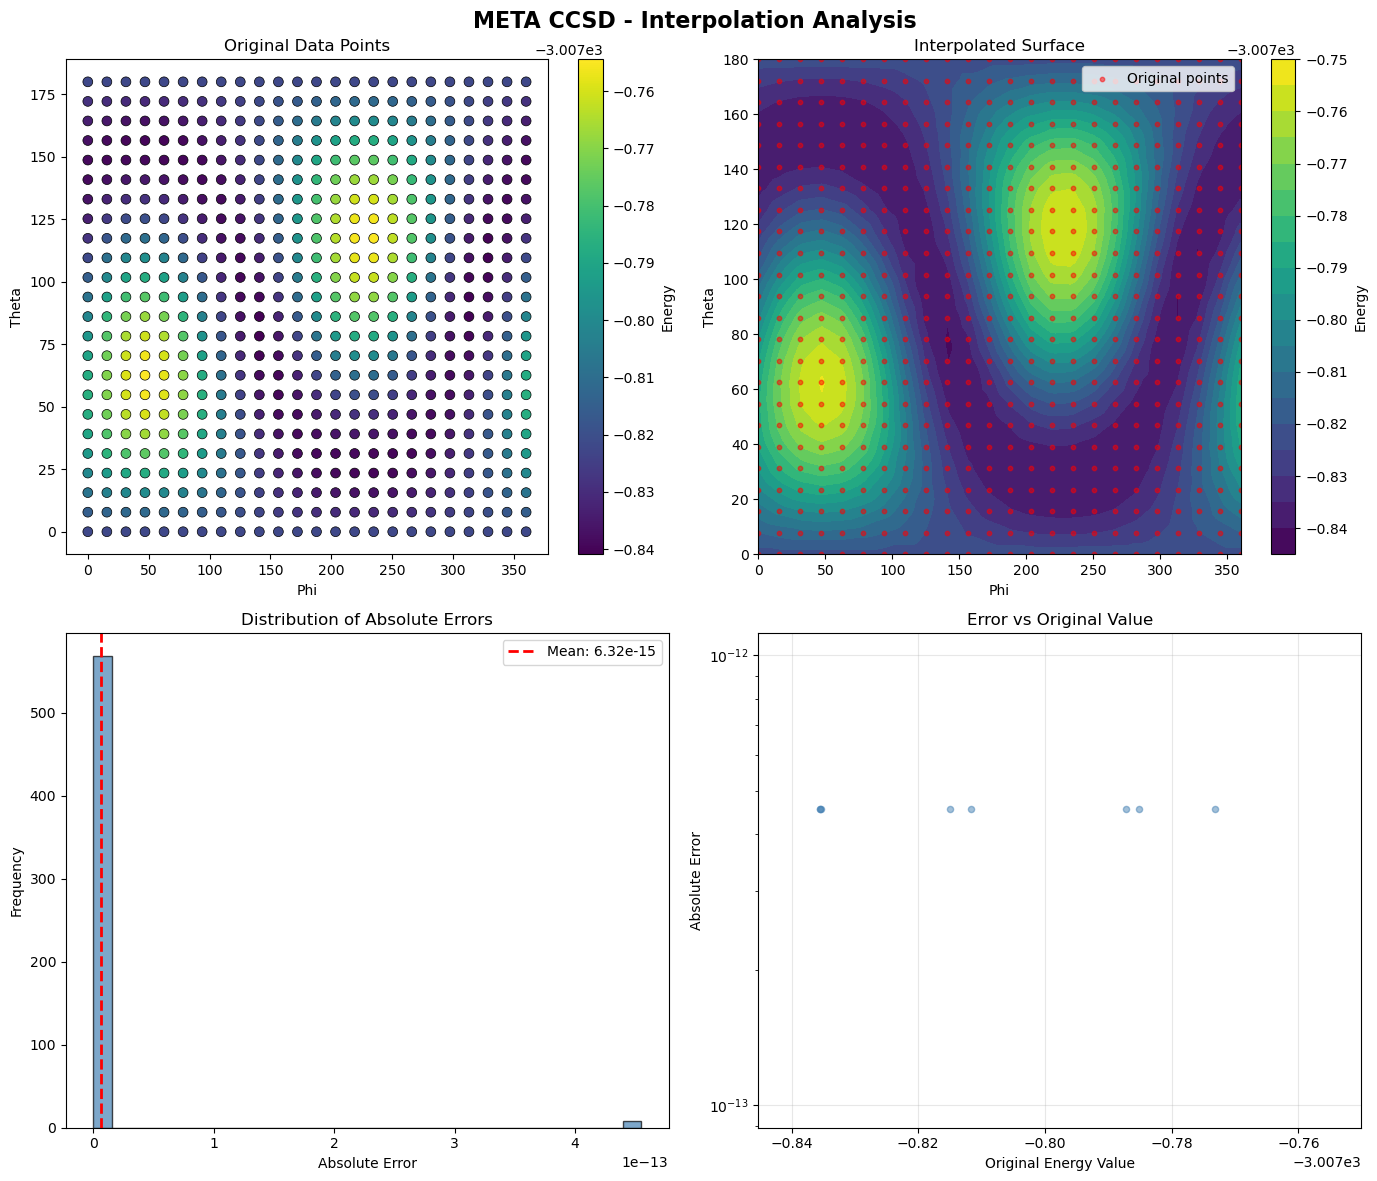


Processing: PARA CCSD
Data points: 576
Theta range: [0.0000, 180.0000]
Phi range: [0.0000, 360.0000]
Value range: [-3.007852e+03, -3.007756e+03]

Interpolation Accuracy Assessment:
------------------------------------------------------------
Successfully interpolated: 576/576

Absolute Error Statistics:
  Mean: 5.526444e-15
  Std:  4.982564e-14
  Max:  4.547474e-13
  Min:  0.000000e+00

Relative Error Statistics (%):
  Mean: 0.0000%
  Std:  0.0000%
  Max:  0.0000%

5 Worst Interpolation Points:
------------------------------------------------------------
1. Theta=70.4348, Phi=266.0870
   Original: -3007.799999, Interpolated: -3007.799999
   Error: 4.547474e-13, Relative: 0.0000%
2. Theta=7.8261, Phi=172.1739
   Original: -3007.825892, Interpolated: -3007.825892
   Error: 4.547474e-13, Relative: 0.0000%
3. Theta=31.3043, Phi=281.7391
   Original: -3007.799704, Interpolated: -3007.799704
   Error: 4.547474e-13, Relative: 0.0000%
4. Theta=7.8261, Phi=328.6957
   Original: -3007.802857, I

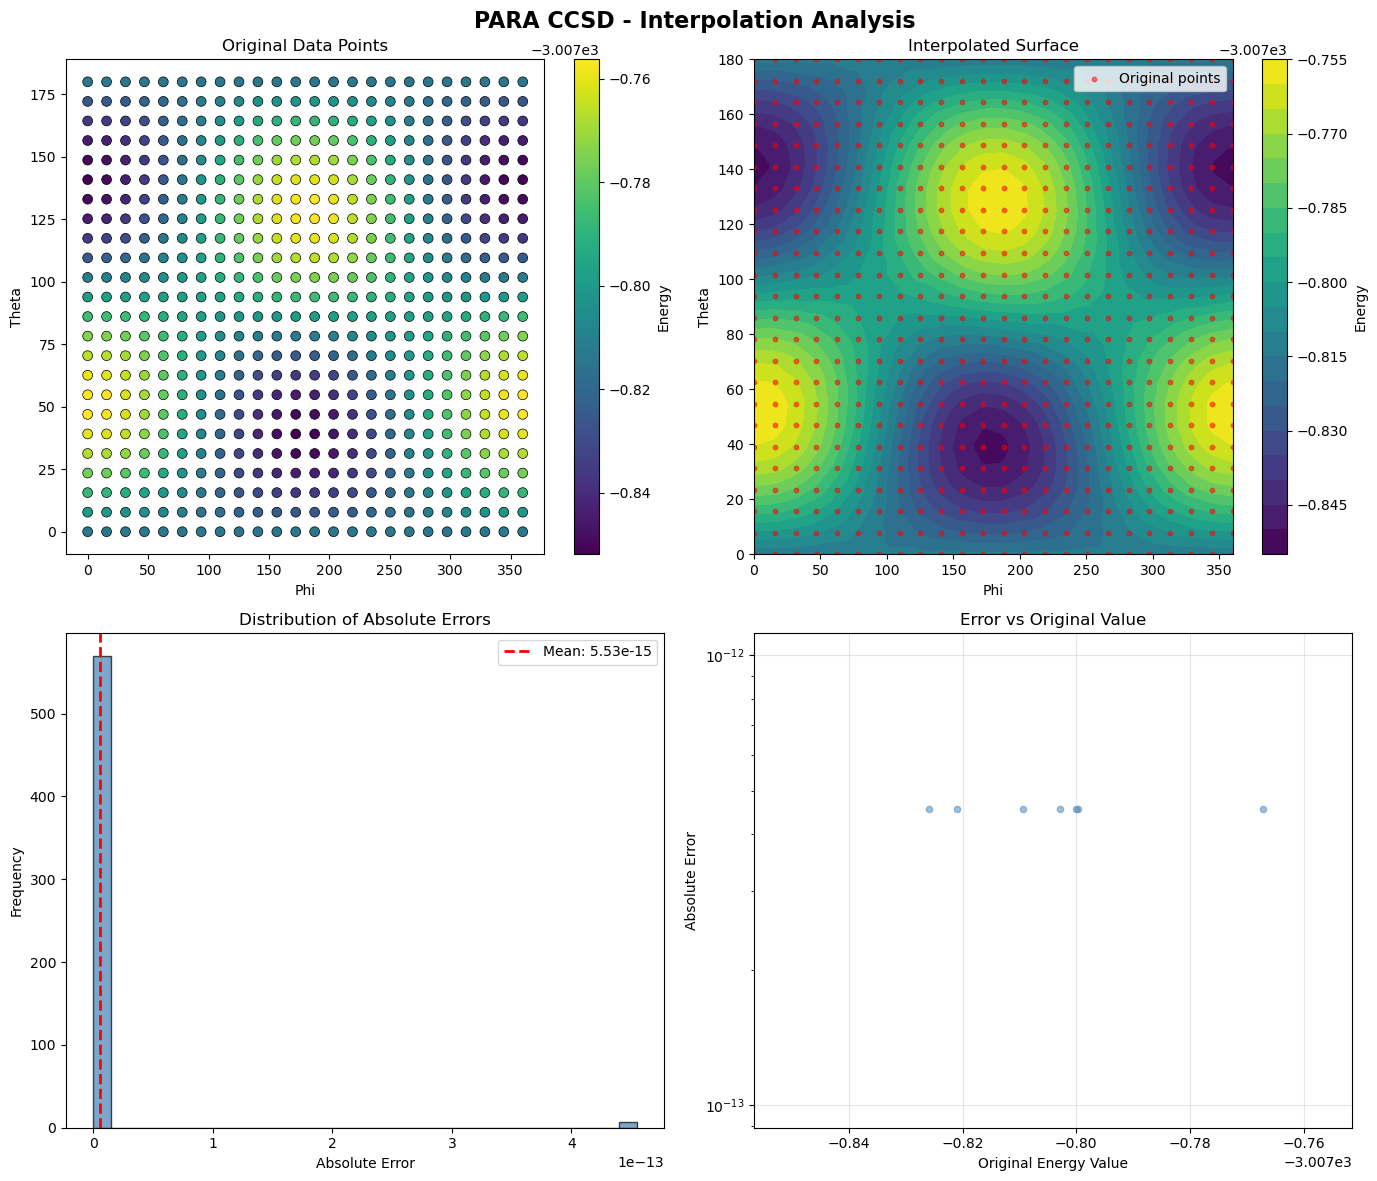


Processing: ORTHO CCSD
Data points: 576
Theta range: [0.0000, 180.0000]
Phi range: [0.0000, 360.0000]
Value range: [-3.007838e+03, -3.007778e+03]

Interpolation Accuracy Assessment:
------------------------------------------------------------
Successfully interpolated: 576/576

Absolute Error Statistics:
  Mean: 4.736952e-15
  Std:  4.617009e-14
  Max:  4.547474e-13
  Min:  0.000000e+00

Relative Error Statistics (%):
  Mean: 0.0000%
  Std:  0.0000%
  Max:  0.0000%

5 Worst Interpolation Points:
------------------------------------------------------------
1. Theta=172.1739, Phi=140.8696
   Original: -3007.823421, Interpolated: -3007.823421
   Error: 4.547474e-13, Relative: 0.0000%
2. Theta=148.6957, Phi=203.4783
   Original: -3007.804002, Interpolated: -3007.804002
   Error: 4.547474e-13, Relative: 0.0000%
3. Theta=7.8261, Phi=62.6087
   Original: -3007.811951, Interpolated: -3007.811951
   Error: 4.547474e-13, Relative: 0.0000%
4. Theta=0.0000, Phi=297.3913
   Original: -3007.819266,

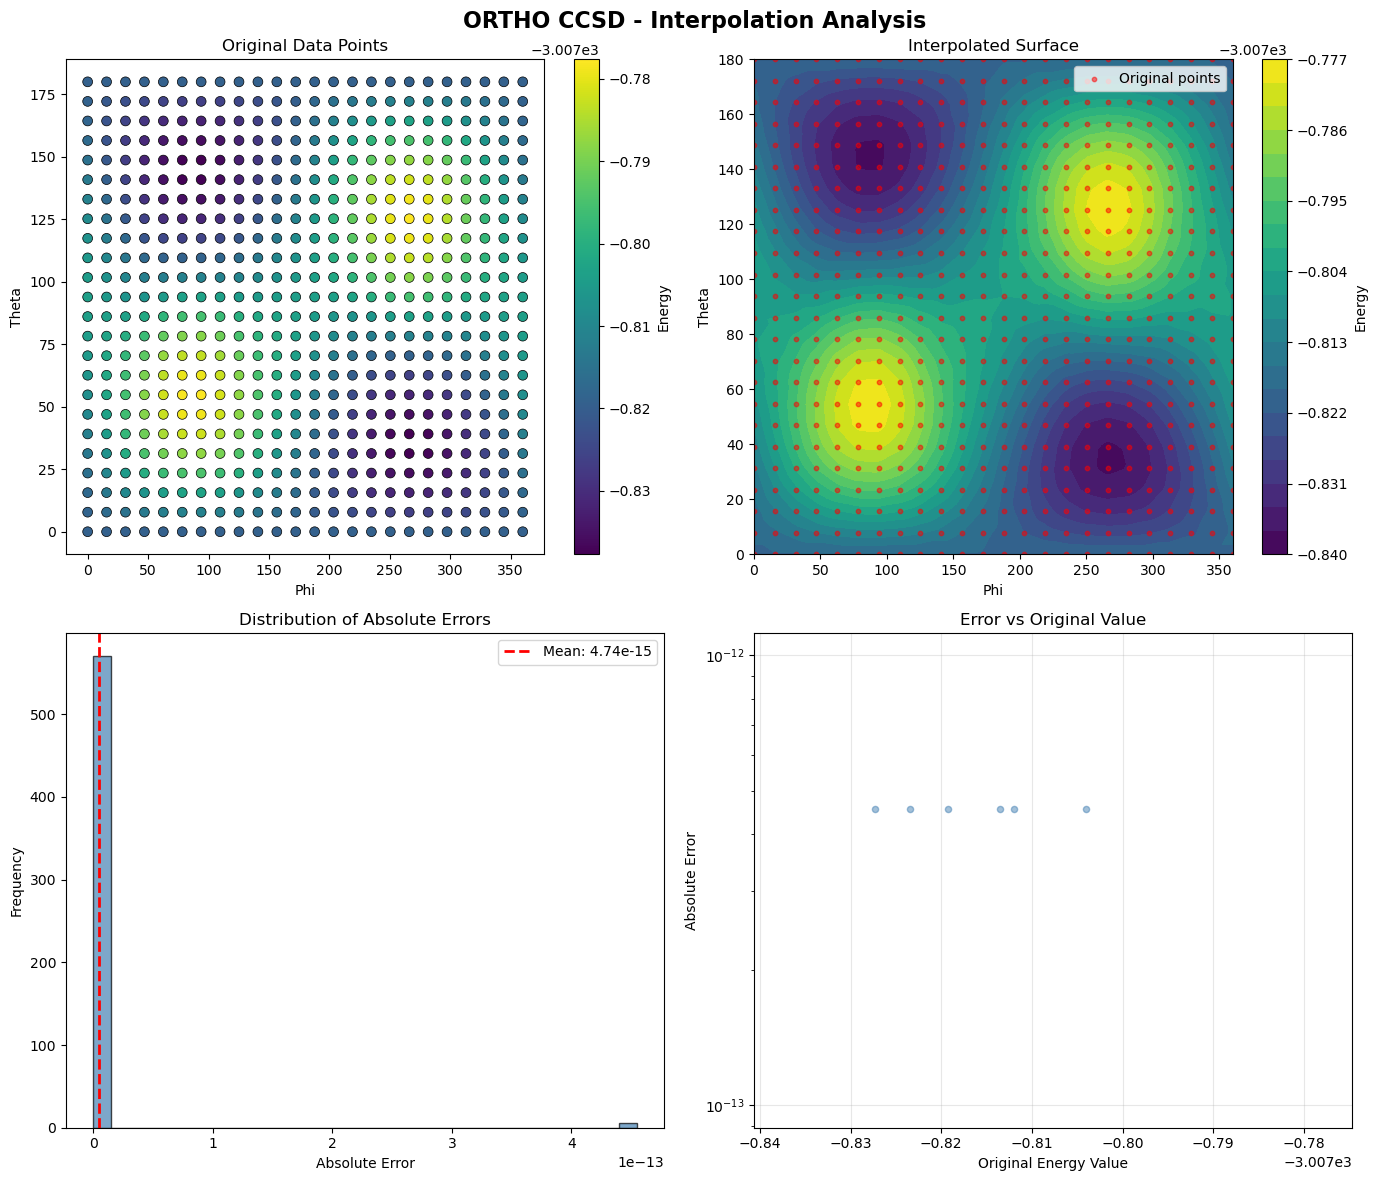


COMPARISON SUMMARY

Dataset         Points     Valid      Mean Abs Err    Mean Rel Err % 
----------------------------------------------------------------------
META CCSD       576        576        6.315935e-15    0.0000         
PARA CCSD       576        576        5.526444e-15    0.0000         
ORTHO CCSD      576        576        4.736952e-15    0.0000         


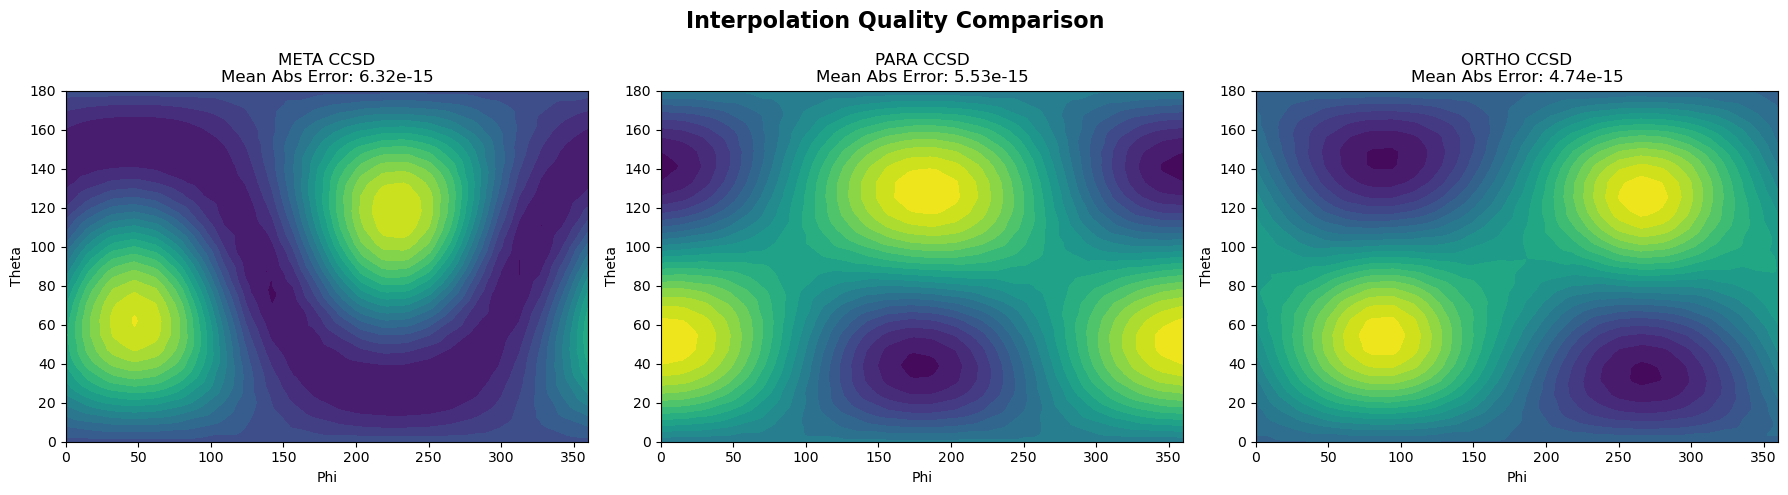


Analysis complete!


In [4]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata

def load_and_analyze_dataset(df, dataset_name, n_grid_points=24):
    """
    Perform interpolation and accuracy analysis on a molecular energy dataset.
    
    Parameters:
    -----------
    df : pandas DataFrame
        DataFrame with columns 'theta', 'phi', 'value'
    dataset_name : str
        Name of the dataset for labeling plots
    n_grid_points : int
        Number of grid points for interpolation in each dimension
    
    Returns:
    --------
    dict : Dictionary containing interpolation results and statistics
    """
    
    print(f"\n{'='*60}")
    print(f"Processing: {dataset_name}")
    print(f"{'='*60}")
    
    # Extract values
    theta_vals = df['theta'].values
    phi_vals = df['phi'].values
    values = df['value'].values
    
    print(f"Data points: {len(values)}")
    print(f"Theta range: [{theta_vals.min():.4f}, {theta_vals.max():.4f}]")
    print(f"Phi range: [{phi_vals.min():.4f}, {phi_vals.max():.4f}]")
    print(f"Value range: [{values.min():.6e}, {values.max():.6e}]")
    
    # Create pivot table
    pivot_df = df.pivot_table(index='theta', columns='phi', values='value')
    pivot_df.index = pivot_df.index.round(4)
    pivot_df.columns = pivot_df.columns.round(4)
    
    # Create fine grid for interpolation
    theta_grid = np.linspace(theta_vals.min(), theta_vals.max(), n_grid_points)
    phi_grid = np.linspace(phi_vals.min(), phi_vals.max(), n_grid_points)
    TH, PH = np.meshgrid(theta_grid, phi_grid)
    
    # Perform interpolation on grid
    grid_values = griddata((theta_vals, phi_vals), values, 
                          (TH, PH), method='linear')
    
    # Test accuracy: interpolate at original data points
    interpolated_at_original = griddata((theta_vals, phi_vals), values,
                                       (theta_vals, phi_vals), method='linear')
    
    # Calculate errors
    absolute_errors = np.abs(values - interpolated_at_original)
    relative_errors = np.abs((values - interpolated_at_original) / values) * 100
    
    # Remove NaN values (edge points)
    valid_mask = ~np.isnan(interpolated_at_original)
    absolute_errors_clean = absolute_errors[valid_mask]
    relative_errors_clean = relative_errors[valid_mask]
    values_clean = values[valid_mask]
    
    # Print statistics
    print(f"\nInterpolation Accuracy Assessment:")
    print(f"{'-'*60}")
    print(f"Successfully interpolated: {np.sum(valid_mask)}/{len(values)}")
    print(f"\nAbsolute Error Statistics:")
    print(f"  Mean: {np.mean(absolute_errors_clean):.6e}")
    print(f"  Std:  {np.std(absolute_errors_clean):.6e}")
    print(f"  Max:  {np.max(absolute_errors_clean):.6e}")
    print(f"  Min:  {np.min(absolute_errors_clean):.6e}")
    print(f"\nRelative Error Statistics (%):")
    print(f"  Mean: {np.mean(relative_errors_clean):.4f}%")
    print(f"  Std:  {np.std(relative_errors_clean):.4f}%")
    print(f"  Max:  {np.max(relative_errors_clean):.4f}%")
    
    # Find worst interpolation points
    worst_indices = np.argsort(absolute_errors_clean)[-5:]
    valid_indices = np.where(valid_mask)[0]
    
    print(f"\n5 Worst Interpolation Points:")
    print(f"{'-'*60}")
    for i, idx in enumerate(worst_indices):
        original_idx = valid_indices[idx]
        print(f"{i+1}. Theta={theta_vals[original_idx]:.4f}, Phi={phi_vals[original_idx]:.4f}")
        print(f"   Original: {values[original_idx]:.6f}, Interpolated: {interpolated_at_original[original_idx]:.6f}")
        print(f"   Error: {absolute_errors_clean[idx]:.6e}, Relative: {relative_errors_clean[idx]:.4f}%")
    
    # Create visualization
    fig, axes = plt.subplots(2, 2, figsize=(14, 12))
    fig.suptitle(f'{dataset_name} - Interpolation Analysis', fontsize=16, fontweight='bold')
    
    # 1. Original data scatter plot
    scatter = axes[0, 0].scatter(df['phi'], df['theta'], c=df['value'], 
                                cmap='viridis', s=50, edgecolors='black', linewidth=0.5)
    axes[0, 0].set_ylabel('Theta')
    axes[0, 0].set_xlabel('Phi')
    axes[0, 0].set_title('Original Data Points')
    plt.colorbar(scatter, ax=axes[0, 0], label='Energy')
    
    # 2. Interpolated surface
    contour = axes[0, 1].contourf(PH, TH, grid_values, levels=20, cmap='viridis')
    axes[0, 1].scatter(phi_vals, theta_vals, c='red', s=10, alpha=0.5, label='Original points')
    axes[0, 1].set_ylabel('Theta')
    axes[0, 1].set_xlabel('Phi')
    axes[0, 1].set_title('Interpolated Surface')
    axes[0, 1].legend()
    plt.colorbar(contour, ax=axes[0, 1], label='Energy')
    
    # 3. Absolute error distribution
    axes[1, 0].hist(absolute_errors_clean, bins=30, edgecolor='black', alpha=0.7, color='steelblue')
    axes[1, 0].set_xlabel('Absolute Error')
    axes[1, 0].set_ylabel('Frequency')
    axes[1, 0].set_title('Distribution of Absolute Errors')
    axes[1, 0].axvline(np.mean(absolute_errors_clean), color='red', linestyle='--', 
                       linewidth=2, label=f'Mean: {np.mean(absolute_errors_clean):.2e}')
    axes[1, 0].legend()
    
    # 4. Error vs original value
    axes[1, 1].scatter(values_clean, absolute_errors_clean, alpha=0.5, s=20, color='steelblue')
    axes[1, 1].set_xlabel('Original Energy Value')
    axes[1, 1].set_ylabel('Absolute Error')
    axes[1, 1].set_title('Error vs Original Value')
    axes[1, 1].set_yscale('log')
    axes[1, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Return results
    return {
        'dataset_name': dataset_name,
        'pivot_df': pivot_df,
        'theta_grid': theta_grid,
        'phi_grid': phi_grid,
        'TH': TH,
        'PH': PH,
        'grid_values': grid_values,
        'mean_abs_error': np.mean(absolute_errors_clean),
        'mean_rel_error': np.mean(relative_errors_clean),
        'max_abs_error': np.max(absolute_errors_clean),
        'n_valid': np.sum(valid_mask),
        'n_total': len(values)
    }


# ===== LOAD ALL DATASETS =====

# META dataset
print("Loading META dataset...")
meta_df = pd.read_csv('META/meta_ccsd_energies.txt', sep='\s+', header=None, 
                      names=['filename', 'value'])
pattern = r"theta_(.*?)_phi_(.*?)\.json"
meta_df[['theta', 'phi']] = meta_df['filename'].str.extract(pattern).astype(float)
meta_df = meta_df[['theta', 'phi', 'value']]
print(f"Loaded {len(meta_df)} rows.")

# PARA dataset
print("\nLoading PARA dataset...")
para_df = pd.read_csv('PARA/para_ccsd_energies.txt',
                      delim_whitespace=True,
                      header=None,
                      names=['theta', 'phi', 'value'])
print(f"Loaded {len(para_df)} rows.")

# ORTHO dataset
print("\nLoading ORTHO dataset...")
ortho_df = pd.read_csv('ORTHO/ortho_cc_files/ortho_ccsd_energies.txt',
                       delim_whitespace=True,
                       header=None,
                       names=['theta', 'phi', 'value'])
print(f"Loaded {len(ortho_df)} rows.")


# ===== ANALYZE ALL DATASETS =====

meta_results = load_and_analyze_dataset(meta_df, "META CCSD", n_grid_points=100)
para_results = load_and_analyze_dataset(para_df, "PARA CCSD", n_grid_points=100)
ortho_results = load_and_analyze_dataset(ortho_df, "ORTHO CCSD", n_grid_points=100)


# ===== COMPARISON SUMMARY =====

print(f"\n{'='*60}")
print("COMPARISON SUMMARY")
print(f"{'='*60}")

results = [meta_results, para_results, ortho_results]

print(f"\n{'Dataset':<15} {'Points':<10} {'Valid':<10} {'Mean Abs Err':<15} {'Mean Rel Err %':<15}")
print(f"{'-'*70}")
for r in results:
    print(f"{r['dataset_name']:<15} {r['n_total']:<10} {r['n_valid']:<10} "
          f"{r['mean_abs_error']:<15.6e} {r['mean_rel_error']:<15.4f}")

# Create comparison plot
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Interpolation Quality Comparison', fontsize=16, fontweight='bold')

for i, r in enumerate(results):
    axes[i].contourf(r['PH'], r['TH'], r['grid_values'], levels=20, cmap='viridis')
    axes[i].set_xlabel('Phi')
    axes[i].set_ylabel('Theta')
    axes[i].set_title(f"{r['dataset_name']}\nMean Abs Error: {r['mean_abs_error']:.2e}")

plt.tight_layout()
plt.show()

print("\nAnalysis complete!")